In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
fpkmfile = 'sheep_tissue_FPKM.tsv.gz'
df = pd.read_csv(fpkmfile, sep='\t')
df.head()

,chr,start,end,name,gene,jirou,ganzang,liuwei,zhifang,pifu,...,xiongxian,fugao,gaowan,shuluanguan,zhichang,chengxianweixibao,luanpao,wangmo,huangti,naogan
0,1,49237,54549,LOC106990386,gene0,3.166491,0.093451,1.194797,0.064356,0.745837,...,1.092914,0.361922,0.633466,0.909592,0.000000,0.000000,0.200848,0.000000,0.000000,0.000000
1,1,257197,267346,BOK,gene10,2.338026,30.374384,13.244110,29.423929,16.284243,...,1.982640,5.087539,0.601536,2.282869,14.781034,2.545257,0.945352,3.015635,0.860556,1.332306
2,1,7005744,7104355,UGT1A4,gene100,0.064349,80.865318,21.085617,0.269467,0.104789,...,0.091232,2.062925,0.106058,0.027895,6.757673,0.000000,0.000000,0.067705,0.000000,0.178051
3,1,92935824,92940111,LOC106990460,gene1000,0.358879,1.950747,2.262075,1.452335,1.247646,...,0.862130,2.514859,0.532156,0.917190,1.551993,0.598066,0.484448,0.466799,0.355105,0.495066
4,5,59178010,59185786,CD74,gene10000,560.250666,2103.083554,322.873678,672.439219,362.631845,...,3298.662450,135.071706,188.940151,300.692606,469.252257,0.028406,55.897533,46.704260,95.656157,56.585218


In [3]:
tissues = df.columns[5:]

In [4]:
def E50(ay):
    ay[ay < 1] = 1
    ay = np.log2(ay)
    count = 0
    suma = np.sum(ay)
    haf = suma / 2
    tmp = 0
    for i in sorted(ay)[::-1]:
        tmp += i
        count += 1
        if tmp >= haf:
            return count

In [5]:
df['E50'] = df[tissues].apply(E50, axis=1)

In [6]:
def cal_order(array: np.array, item):
    return 1 + len(array[array > item])

In [7]:
ranks = []
for row in df[tissues].values:
    rank = cal_order(row, row[2])
    ranks.append(rank)
df['rumen_rank'] = ranks

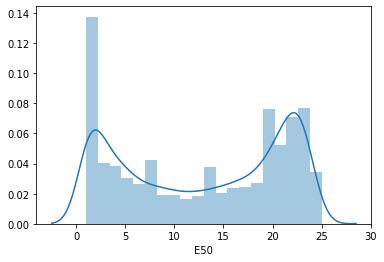

In [8]:
sns.distplot(df['E50'], bins=20)

In [9]:
df[['E50']].to_csv('sheep_E50.csv', index=False, header=True)

In [10]:
mRNAs = {x.strip() for x in open('sheep_mRNA_geneName.list')}
df['mRNA'] = 'No'
df.loc[df['name'].isin(mRNAs), 'mRNA'] = 'Yes'

In [11]:
# E50 cutoff (11) is calculated by 02_E50cutoff.ipynb
emRNAgeneIDs = set(df.loc[(df['rumen_rank']<=df['E50']) &
                          (df['E50']<=11) &
                          (df['liuwei']>=1) &
                          (df['mRNA']=='Yes'), 'gene'].values)

In [12]:
odf = df.loc[df['gene'].isin(emRNAgeneIDs), :]

In [13]:
odf.shape

(656, 58)